# Real time Data Science Project - Part 1

### Importing necessary libraries

In [1]:
import pandas as pd
import os

all_Months_Sales = pd.DataFrame()

files=[file for file in os.listdir('Data_Sales')]
print(files)


['Sales_December_2019.csv', 'Sales_March_2019.csv', 'Sales_August_2019.csv', 'Sales_November_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_October_2019.csv', 'Sales_May_2019.csv', 'Sales_September_2019.csv', 'Sales_April_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv']


### Merging 12 months of sales data into a single file

In [2]:
for file in files:
  df= pd.read_csv('./Data_Sales/' + file)
  all_Months_Sales = pd.concat([all_Months_Sales,df])

In [3]:
all_Months_Sales.head()
all_Months_Sales.to_csv("all_data.csv",index=False)

In [4]:
all_data= pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


 ### Clean-up the data from NA values

In [5]:
all_data = all_data.dropna()
nan_rows = all_data[all_data.isnull().T.any()]
nan_rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## Task: Add more columns

### Add a Month column

In [6]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
# We need to convert date to date format and extract month from it
all_data['Order Date'] = all_data['Order Date'].astype("datetime64[ns]")
all_data.head()
all_data['Month']=pd.DatetimeIndex(all_data["Order Date"]).month
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12


### Add a Sales Column

In [7]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype("int")
all_data['Price Each'] = all_data['Price Each'].astype("float")
all_data['Sales']=all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95


### Q1 - What was the best of month of Sales?

In [8]:
total_sales=all_data.groupby("Month").sum()
total_sales["Sales"]

Month
1     1.940343e+06
2     2.306519e+06
3     2.920712e+06
4     2.187293e+06
5     3.256060e+06
6     2.687731e+06
7     2.751718e+06
8     2.339354e+06
9     2.209846e+06
10    3.857100e+06
11    3.312651e+06
12    4.722707e+06
Name: Sales, dtype: float64

### Let's visualize the month of sales

Text(0.5, 1.0, 'total sales over the months')

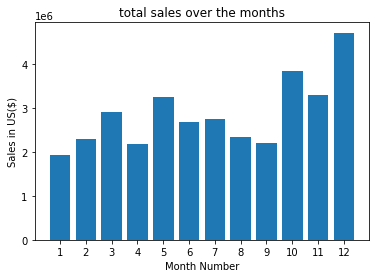

In [9]:
import matplotlib.pyplot as plt
months=range(1,13)

plt.bar(months,total_sales["Sales"])
plt.xticks(months)
plt.ylabel("Sales in US($)")
plt.xlabel("Month Number")
plt.title("total sales over the months")

### Q2 - Which city has the highest number of sales?

#### First we need to add a new column and grab the city name from Pruchase Address with using apply() function

In [10]:
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_data["City"]=all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [11]:
city_sales=all_data.groupby("City").sum()

#city_sales = city_sales.sort_values(by = ['Sales'], ascending=[True])
City = [city for city, df in city_sales.groupby("City")]
City
city_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,106293,2.795499e+06
Austin (TX),11153,1.809874e+06,70833,1.819582e+06
Boston (MA),22528,3.637410e+06,143041,3.661642e+06
Dallas (TX),16730,2.752628e+06,105860,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,211243,5.452571e+06
New York City (NY),27932,4.635371e+06,178236,4.664317e+06
Portland (ME),2750,4.471893e+05,17338,4.497583e+05
Portland (OR),11303,1.860558e+06,71626,1.870732e+06
San Francisco (CA),50239,8.211462e+06,320243,8.262204e+06


### Let's visualize above data 

Text(0.5, 1.0, 'total sales over the cities')

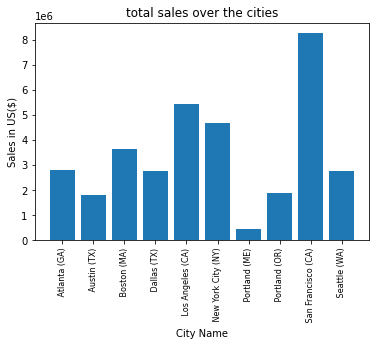

In [12]:
plt.bar(City,city_sales["Sales"])
plt.xticks(City, rotation = 'vertical', size = 8)
plt.ylabel("Sales in US($)")
plt.xlabel("City Name")
plt.title("total sales over the cities")

### Q3 - What time should we display advertisements to maximize likelihood of customer's buying product? 

In [13]:
all_data['Hour']=pd.DatetimeIndex(all_data["Order Date"]).hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12


In [14]:
best_hours =all_data.groupby("Hour").sum()
best_hours

,Quantity Ordered,Price Each,Month,Sales
Hour,,,,
0,4428,709296.70,27891,713721.27
1,2619,458490.00,16963,460866.88
2,1398,233833.64,8652,234851.44
3,928,144726.42,5973,145757.89
4,937,162058.18,6209,162661.01
5,1493,229621.21,9431,230679.82
6,2810,445000.11,17840,448113.00
7,4556,740568.11,29294,744854.12
8,7002,1185970.62,44295,1192348.97


Text(0.5, 1.0, 'order change over a day')

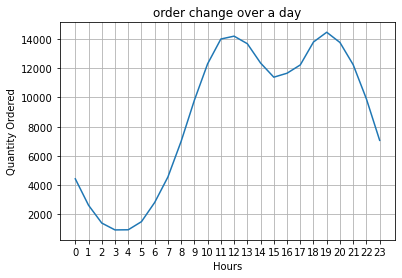

In [15]:
Hour=range(0,24)
plt.plot(Hour,best_hours["Quantity Ordered"])
plt.grid()
plt.xticks(Hour)
plt.ylabel("Quantity Ordered")
plt.xlabel("Hours")
plt.title("order change over a day")


### Q4 - What products are most often sold together?

In [16]:
df=all_data[all_data["Order ID"].duplicated(keep=False)]
df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df = df[["Order ID","Grouped"]].drop_duplicates()
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [17]:
from itertools import combinations
from collections import Counter

### We need to count the most common combinations that we see in the above table in "Gropued" column
### We will list the mst common bought together items with 2 items
### You can change the (row_list,2) to(row,list,3) to see the most common 3 items bought together. Give it a try :)

In [23]:
count=Counter()

for row in df["Grouped"]:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2)))

### Let's list most common items that is bought together

In [24]:
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Q5 - What product sold the most? Why do you think it sold the most?

In [25]:
most_sold =all_data.groupby("Product").sum()
most_sold

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29678,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44974,2435097.56,90916
27in FHD Monitor,7550,1125974.93,53400,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43976,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,147659,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,148327,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,110893,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,95437,1345565.43,192445
Flatscreen TV,4819,1440000.00,34723,1445700.00,68815


Text(0.5, 1.0, 'Most Sold Items')

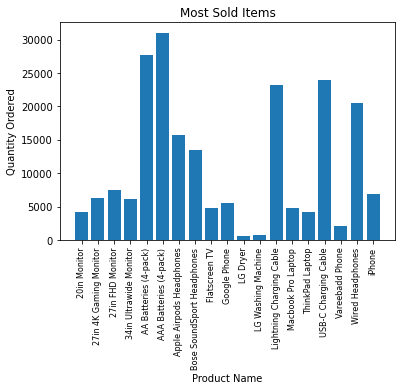

In [30]:
Product = [product for product, df in most_sold.groupby("Product")]

plt.bar(Product,most_sold["Quantity Ordered"])
plt.xticks(Product, rotation = 'vertical', size = 8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product Name")
plt.title("Most Sold Items")

### In this section let's try to justify our Hyphothesis that why those product most sold. One approach could be show their average price on the same graph because they seemed slightly cheaper ones to the others. Let's see that is there any correlation between the mean price and quantity ordered. 

In [38]:
average_price =all_data.groupby("Product").mean()["Price Each"]
average_price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

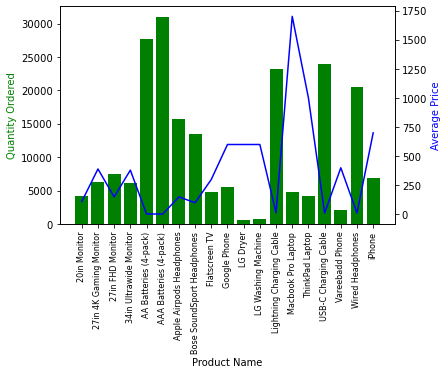

In [35]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Product, most_sold["Quantity Ordered"], color='g')
ax2.plot(Product, average_price, 'b-')
ax1.set_xticklabels(Product, rotation = 'vertical', size = 8)
ax1.set_xlabel('Product Name')
ax1.set_ylabel("Quantity Ordered", color='g')
ax2.set_ylabel('Average Price', color='b')

plt.show()

### I want to also add a correlation plot between Average Price and Quantity Ordered

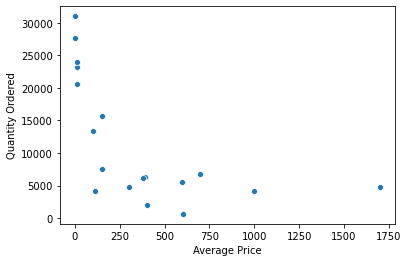

In [44]:
import seaborn as sns

most_sold["Average Price"]=most_sold["Price Each"]/most_sold["Quantity Ordered"]

sns.scatterplot(x="Average Price", y="Quantity Ordered", data=most_sold);


### From the above graph there is a strong negative correlation between the Quantity Ordered vs Average Price

### I want to add it's Spearman correlation coefficient (because it is more like a monolitic function) as well. From the below result first value is Pearson correlation coefficient and second one is p-value. This is the probability that the true value of r is zero (no correlation).

In [48]:
from scipy import stats
stats.spearmanr(most_sold['Average Price'], most_sold['Quantity Ordered'])


SpearmanrResult(correlation=-0.7906977505373949, pvalue=5.581369661402971e-05)